# Übung 16 - MLP

## MLP für Regression

In [1]:
# Hier nutzen wir den California Housing Datensatz
# https://scikit-learn.org/dev/datasets/real_world.html#california-housing-dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
display(pd.DataFrame(housing.data))
display(pd.DataFrame(housing.target))

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train-Test-Split durchführen
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.8, random_state=42)

# Definieren des MLP -- wenn MLPRegressor, als Verlustfunktion automatisch MSE & KEINE Aktivierungsfunktion im Outputlayer
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(50, 50, 50),
    activation='relu',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=1000,
    solver='sgd',
    random_state=42
)

# Daten müssen standardisiert werden (automatisch in der "Pipeline")
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# Standardisieren und trainieren der Daten / des KNN
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000,
                              random_state=42, solver='sgd'))])

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluieren des MLP
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.5552028672070315
R-squared: 0.7678729672182529


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## MLP für Klassifikation

In [10]:
# Hier laden wir den MNIST Datensatz von Scikit-Learn für die Klassifikation
# https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml

from sklearn.datasets import fetch_openml
import pandas as pd

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Features "normalisieren" --> Werte sind zwischen 0 & 255 --> X/255
X = X / 255.0

display(pd.DataFrame(X))
display(pd.DataFrame(y))

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


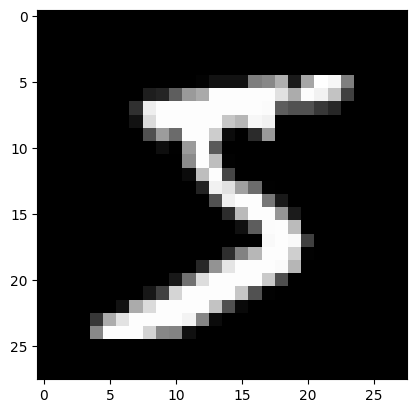

In [11]:
# Visualisieren einer Ziffer (bspw. 1. Ziffer)
import matplotlib.pyplot as plt

ziffer = X[0].reshape(28, 28)
plt.imshow(ziffer, cmap='gray')
plt.show()

In [12]:
# NN trainieren
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#Train-Test-Split durchführen
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.8)

#NN definieren --> Als Verlustfunktion wird automatisch die Log-Loss-Funktion genommen
#Aktivierungsfunktion im Output-Layer wird automatisch festgelegt: binäre Klassifikation -> Sigmoid, multinomiale Klassifikation -> Softmax
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    activation='relu',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=100,
    solver='sgd',
    random_state=42
)

#NN trainieren
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(40,), max_iter=100, random_state=42,
              solver='sgd')

Accuracy: 0.91675
Confusion Matrix:
 [[5348    0   24    7   10   46   46    8   31    8]
 [   2 6093   26   30    3   34    8   16   48    4]
 [  39   42 4974   78   82   27   92   82  129   31]
 [  14   31  135 5076    2  214   28   75   96   56]
 [   7   31   37    8 5027    3   60   13   38  236]
 [  59   36   32  133   69 4442   98   23  107   49]
 [  46   18   48    6   64   72 5238    4   16    4]
 [  25   46  108   29   86    9    0 5385   15  161]
 [  20  120   77  162   30  153   49   26 4743   70]
 [  36   35   17   66  150   43    4  169   35 5012]]


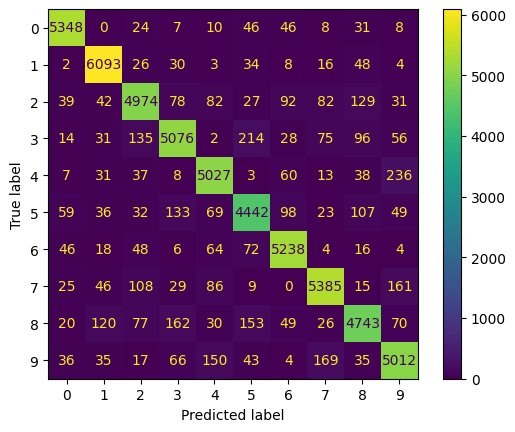

Precision: 0.91675
Recall: 0.91675
F1-Score: 0.91675


In [13]:
# Modell evaluieren

## Accuracy berechnen
from sklearn.metrics import accuracy_score
y_pred = mlp.predict(X_test)
y_scores = mlp.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

## Confusion Matrix berechnen
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)
## Confusion Matrix visualisieren
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Precision und Recall berechnen -> beachten Sie, dass definiert werden muss wie die Precision & Recall aggregiert / gemittelt werden
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
print('Precision:', precision)
print('Recall:', recall)

## F1-Score berechnen -> analog muss auch der f1-score aggregiert / gemittelt werden
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='micro')
print('F1-Score:', f1)



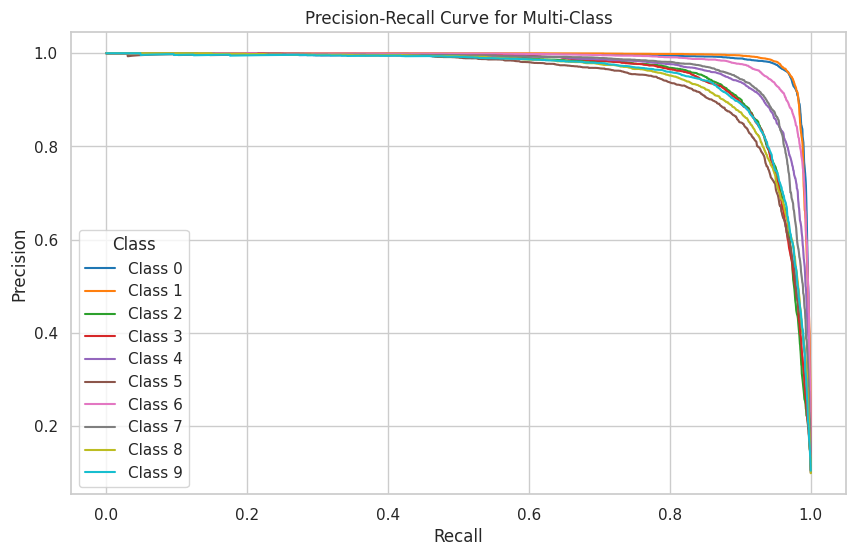

In [14]:
# PR-Curve mit Seaborn visualisieren
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
import pandas as pd

y_test_bin = pd.get_dummies(y_test).values

pr_data = []
for i in range(y_test_bin.shape[1]):
    y_scores = mlp.predict_proba(X_test)[:, i]  # Wahrscheinlichkeiten für Klasse i
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores)
    pr_data.append(pd.DataFrame({'Precision': precision, 'Recall': recall, 'Class': f'Class {i}'}))

# DataFrame für alle Klassen zusammenführen
pr_df = pd.concat(pr_data)

# PR-Kurven mit Seaborn plotten
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=pr_df, x='Recall', y='Precision', hue='Class', palette='tab10')
plt.title('Precision-Recall Curve for Multi-Class')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(title='Class')
plt.show()

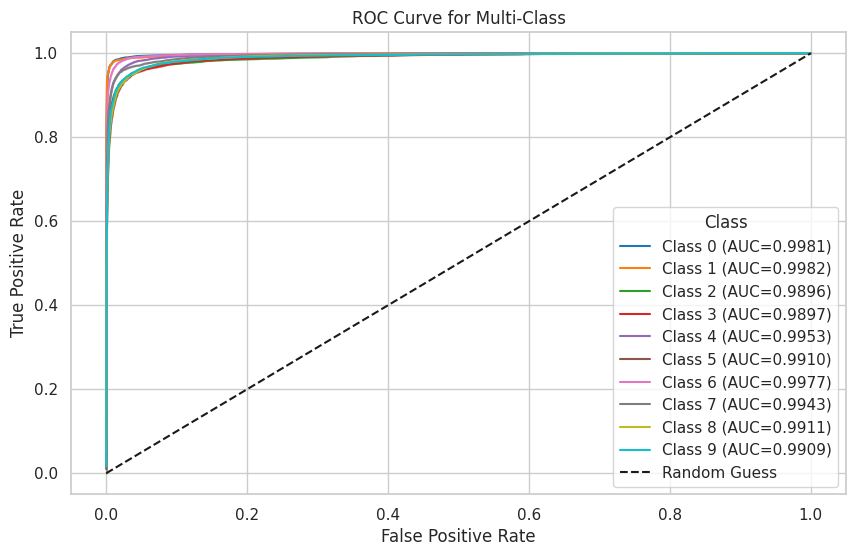

In [15]:
# ROC-Curve mit seaborn visualisieren
from sklearn.metrics import roc_curve, auc

# Daten sammeln
roc_data = []
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], mlp.predict_proba(X_test)[:, i])
    auc_score = auc(fpr, tpr)
    roc_data.append(pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Class': f'Class {i} (AUC={auc_score:.4f})'}))

# DataFrame für alle Klassen zusammenführen
roc_df = pd.concat(roc_data)

# ROC-Kurven mit Seaborn plotten
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=roc_df, x='False Positive Rate', y='True Positive Rate', hue='Class', palette='tab10')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonale für zufälliges Raten
plt.title('ROC Curve for Multi-Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(title='Class')
plt.show()